# Lending Club Loan Data Analysis

DESCRIPTION

Create a model that predicts whether or not a loan will be default using the historical data.

Problem Statement:  

For companies like Lending Club correctly predicting whether or not a loan will be a default is very important. In this project, using the historical data from 2007 to 2015, you have to build a deep learning model to predict the chance of default for future loans. As you will see later this dataset is highly imbalanced and includes a lot of features that makes this problem more challenging.DESCRIPTION

Create a model that predicts whether or not a loan will be default using the historical data.

 

Problem Statement:  

For companies like Lending Club correctly predicting whether or not a loan will be a default is very important. In this project, using the historical data from 2007 to 2015, you have to build a deep learning model to predict the chance of default for future loans. As you will see later this dataset is highly imbalanced and includes a lot of features that makes this problem more challenging.

Domain: Finance

Analysis to be done: Perform data preprocessing and build a deep learning prediction model. 

Content: 

Dataset columns and definition:

 

credit.policy: 1 if the customer meets the credit underwriting criteria of LendingClub.com, and 0 otherwise.

purpose: The purpose of the loan (takes values "credit_card", "debt_consolidation", "educational", "major_purchase", "small_business", and "all_other").

int.rate: The interest rate of the loan, as a proportion (a rate of 11% would be stored as 0.11). Borrowers judged by LendingClub.com to be more risky are assigned higher interest rates.

installment: The monthly installments owed by the borrower if the loan is funded.

log.annual.inc: The natural log of the self-reported annual income of the borrower.

dti: The debt-to-income ratio of the borrower (amount of debt divided by annual income).

fico: The FICO credit score of the borrower.

days.with.cr.line: The number of days the borrower has had a credit line.

revol.bal: The borrower's revolving balance (amount unpaid at the end of the credit card billing cycle).

revol.util: The borrower's revolving line utilization rate (the amount of the credit line used relative to total credit available).

inq.last.6mths: The borrower's number of inquiries by creditors in the last 6 months.

delinq.2yrs: The number of times the borrower had been 30+ days past due on a payment in the past 2 years.

pub.rec: The borrower's number of derogatory public records (bankruptcy filings, tax liens, or judgments).

 

Steps to perform:

Perform exploratory data analysis and feature engineering and then apply feature engineering. Follow up with a deep learning model to predict whether or not the loan will be default using the historical data.

 

Tasks:

1.     Feature Transformation

Transform categorical values into numerical values (discrete)

2.     Exploratory data analysis of different factors of the dataset.

3.     Additional Feature Engineering

You will check the correlation between features and will drop those features which have a strong correlation

This will help reduce the number of features and will leave you with the most relevant features

4.     Modeling

After applying EDA and feature engineering, you are now ready to build the predictive models

In this part, you will create a deep learning model using Keras with Tensorflow backend

In [76]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [77]:
df = pd.read_csv('./resources/loan_data.csv')

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [79]:
df.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


In [80]:
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [81]:
# check for null values
assert(df.isnull().sum().sum()==0)

In [82]:
df['not.fully.paid'].value_counts()

0    8045
1    1533
Name: not.fully.paid, dtype: int64

## EDA

In [83]:
import seaborn as sns

c:\Users\of6cef\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


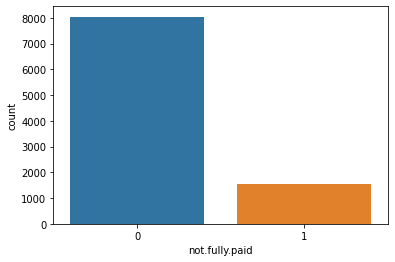

In [84]:
sns.countplot(df['not.fully.paid'])
plt.show()

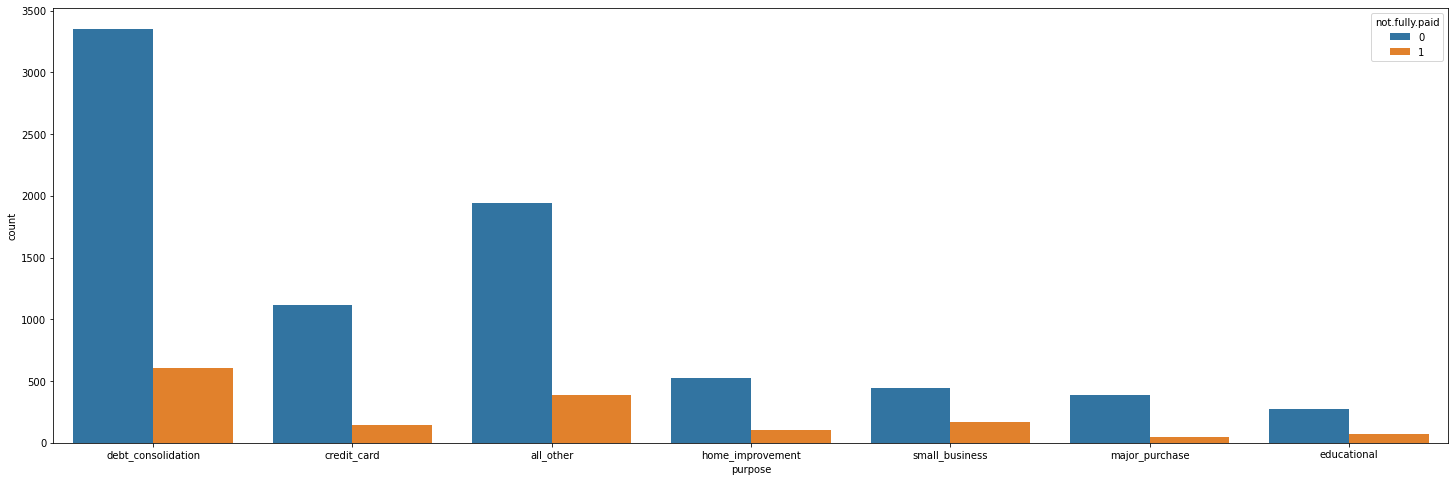

In [85]:
plt.figure(figsize=(25,8))
sns.countplot(x='purpose', hue='not.fully.paid', data=df)
plt.show()

<Figure size 1800x576 with 0 Axes>

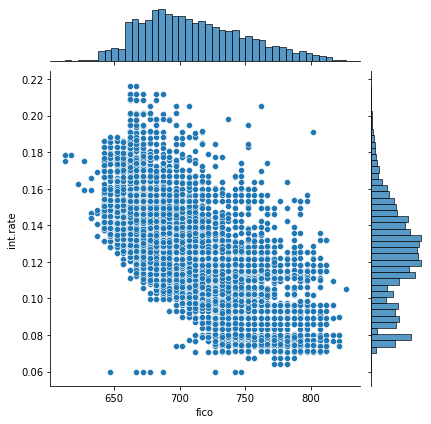

In [86]:
plt.figure(figsize=(25,8))
sns.jointplot(x='fico', y='int.rate', data=df)
plt.show()

### handle imbalanced data

In [87]:
not_fully_paid_0 = df[df['not.fully.paid'] == 0]
not_fully_paid_1 = df[df['not.fully.paid'] == 1]

In [88]:
# resample
from sklearn.utils import resample
df_minor_upsampled=resample(not_fully_paid_1,replace=True,n_samples=8045)
new_df=pd.concat([not_fully_paid_0,df_minor_upsampled])
from sklearn.utils import shuffle
new_df=shuffle(new_df)

In [89]:
new_df['not.fully.paid'].value_counts()

0    8045
1    8045
Name: not.fully.paid, dtype: int64

In [90]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for i in new_df.columns:
  if new_df[i].dtypes=='object':
    new_df[i]=le.fit_transform(new_df[i])

In [91]:
new_df

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
1599,1,6,0.0768,93.57,11.225243,11.90,752,3210.000000,5263,48.7,0,0,0,0
6998,1,2,0.1183,447.31,10.548416,22.54,712,6000.041667,13813,52.7,0,0,0,0
341,1,6,0.1204,126.29,11.050890,12.50,667,3300.000000,29736,80.2,3,0,0,0
1512,1,0,0.1146,329.57,11.512925,4.43,707,2850.000000,13175,46.9,2,0,0,0
1840,1,6,0.0963,154.06,11.775259,7.38,727,5490.000000,27399,41.1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2711,1,1,0.0963,385.14,10.915670,21.17,757,10739.958330,25133,38.8,1,0,0,0
9469,0,0,0.1635,379.79,12.072541,17.74,722,5850.000000,71956,25.7,4,0,0,0
7189,1,2,0.1385,835.55,11.340950,21.72,712,5250.041667,33313,74.4,0,0,0,0
8706,0,0,0.1608,149.59,10.463218,26.36,667,6960.000000,6644,35.9,12,0,0,0


In [92]:
new_df.corr().abs()['not.fully.paid'].sort_values(ascending=False)

not.fully.paid       1.000000
int.rate             0.224811
fico                 0.214893
credit.policy        0.190425
inq.last.6mths       0.169690
revol.util           0.113486
pub.rec              0.066881
installment          0.066349
revol.bal            0.061645
purpose              0.059792
dti                  0.058692
log.annual.inc       0.046833
days.with.cr.line    0.036720
delinq.2yrs          0.016890
Name: not.fully.paid, dtype: float64

<AxesSubplot:>

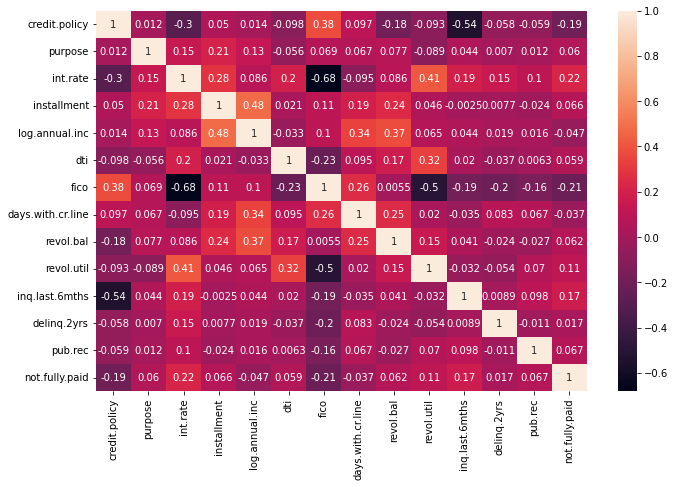

In [93]:
plt.figure(figsize=(11,7))
sns.heatmap(new_df.corr(), annot=True)

In [94]:
X=new_df[['int.rate','fico','credit.policy','inq.last.6mths','revol.util','installment','purpose','dti','pub.rec']]

In [95]:
y=new_df[['not.fully.paid']]

In [96]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=10)

In [97]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

### Apply Model Building-ANN

In [98]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping

In [99]:
model = Sequential()
model.add(Dense(19, activation='relu', input_shape=[9]))
model.add(Dropout(0.3))
model.add(Dense(10, activation='relu',))
model.add(Dropout(0.3))
# output layer
model.add(Dense(1, activation='sigmoid'))

In [100]:
# compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [101]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 19)                190       
                                                                 
 dropout_2 (Dropout)         (None, 19)                0         
                                                                 
 dense_4 (Dense)             (None, 10)                200       
                                                                 
 dropout_3 (Dropout)         (None, 10)                0         
                                                                 
 dense_5 (Dense)             (None, 1)                 11        
                                                                 
Total params: 401
Trainable params: 401
Non-trainable params: 0
_________________________________________________________________


In [102]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', patience=10)

In [103]:
model.fit(X_train,y_train,
          epochs=50,
          batch_size=256,
          validation_data=(X_test,y_test),
          callbacks=early_stop
          )

Epoch 1/50
51/51 [==============================] - 1s 4ms/step - loss: 0.7499 - accuracy: 0.5007 - val_loss: 0.6855 - val_accuracy: 0.5510
Epoch 2/50
51/51 [==============================] - 0s 2ms/step - loss: 0.6980 - accuracy: 0.5412 - val_loss: 0.6695 - val_accuracy: 0.5799
Epoch 3/50
51/51 [==============================] - 0s 2ms/step - loss: 0.6781 - accuracy: 0.5699 - val_loss: 0.6631 - val_accuracy: 0.5932
Epoch 4/50
51/51 [==============================] - 0s 2ms/step - loss: 0.6744 - accuracy: 0.5771 - val_loss: 0.6593 - val_accuracy: 0.5985
Epoch 5/50
51/51 [==============================] - 0s 2ms/step - loss: 0.6688 - accuracy: 0.5823 - val_loss: 0.6572 - val_accuracy: 0.6019
Epoch 6/50
51/51 [==============================] - 0s 2ms/step - loss: 0.6672 - accuracy: 0.5831 - val_loss: 0.6555 - val_accuracy: 0.5985
Epoch 7/50
51/51 [==============================] - 0s 2ms/step - loss: 0.6635 - accuracy: 0.5878 - val_loss: 0.6541 - val_accuracy: 0.6013
Epoch 8/50
51/51 [==

In [ ]:
sns.lineplot()

In [107]:
predictions = (model.predict(X_test) > 0.5).astype('int64')

101/101 [==============================] - 0s 937us/step


In [108]:
predictions

array([[1],
       [1],
       [1],
       ...,
       [1],
       [1],
       [1]], dtype=int64)

In [110]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [111]:
score = model.evaluate(X_test,)
print(score)

101/101 [==============================] - 0s 987us/step - loss: 0.0000e+00 - accuracy: 0.0000e+00
[0.0, 0.0]


In [112]:
accuracy_score(y_test,predictions)

0.6084524549409571

In [113]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.63      0.52      0.57      1596
           1       0.59      0.70      0.64      1622

    accuracy                           0.61      3218
   macro avg       0.61      0.61      0.60      3218
weighted avg       0.61      0.61      0.61      3218



In [114]:
model.save('model1.h5')

In [116]:
!pip install keras-tuner -q

In [127]:
from keras.layers import BatchNormalization

In [134]:
import keras.optimizers

In [135]:
def build_model(hp):
  model=Sequential()
  #first hidden layer
  model.add(Dense(units=hp.Int('units',min_value=32, max_value=1024,step=16),
                  activation=hp.Choice('activation',['relu','tanh']),input_shape=[9]))
  model.add(BatchNormalization())
  model.add(Dropout(hp.Float('rate',min_value=0.1,max_value=0.5,step=0.1)))
  #second hidden layer
  model.add(Dense(units=hp.Int('units',min_value=32, max_value=1024,step=16),
                  activation=hp.Choice('activation',['relu','tanh'])))
  model.add(BatchNormalization())
  model.add(Dropout(hp.Float('rate',min_value=0.1,max_value=0.5,step=0.1)))
  #Third hidden layer
  model.add(Dense(units=hp.Int('units',min_value=32, max_value=1024,step=16),
                  activation=hp.Choice('activation',['relu','tanh'])))
  model.add(BatchNormalization())
  model.add(Dropout(hp.Float('rate',min_value=0.1,max_value=0.5,step=0.1)))

   #output layer
  model.add(Dense(1,activation='sigmoid'))
  learning_rate=hp.Float('learning_rate',min_value=0.001,max_value=0.1,step=0.01)
  # compile the model
  model.compile(loss='binary_crossentropy',
                optimizer=keras.optimizers.Adam(learning_rate),
                metrics=['accuracy'])
  return model

In [129]:
import keras_tuner as kt

In [136]:
build_model(kt.HyperParameters())

In [140]:
rtuner=kt.RandomSearch(hypermodel=build_model,
                       objective='val_accuracy',
                       max_trials=3,
                       executions_per_trial=2,
                       overwrite=True,
                       )

In [141]:
rtuner.search(X_train,y_train,epochs=4,validation_data=(X_test,y_test), verbose=0,)

INFO:tensorflow:Oracle triggered exit
